In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 200)

import sklearn as sk
from sklearn.model_selection import cross_val_score
import sklearn.ensemble as skens
import sklearn.metrics as skmetric
import sklearn.naive_bayes as sknb
import sklearn.tree as sktree
import matplotlib.pyplot as plt
import sklearn.externals.six as sksix
import IPython.display as ipd
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import os
plt.style.use("seaborn")
plt.figure(figsize=(10,8))

<Figure size 1000x800 with 0 Axes>

In [2]:
data = pd.read_csv('data_cleaned.csv')

In [3]:
data.head()

,Adjusted_Grade,New?,Other_Location_Code_in_LCGMS,School_Name,SED_Code,Location_Code,District,Latitude,Longitude,Address_(Full),City,Zip,Grades,Grade_Low,Grade_High,Community_School?,Economic_Need_Index,School_Income_Estimate,Percent_ELL,Percent_Asian,Percent_Black,Percent_Hispanic,Percent_Black_/_Hispanic,Percent_White,Student_Attendance_Rate,Percent_of_Students_Chronically_Absent,Rigorous_Instruction_%,Rigorous_Instruction_Rating,Collaborative_Teachers_%,Collaborative_Teachers_Rating,Supportive_Environment_%,Supportive_Environment_Rating,Effective_School_Leadership_%,Effective_School_Leadership_Rating,Strong_FamilyCommunity_Ties_%,Strong_FamilyCommunity_Ties_Rating,Trust_%,Trust_Rating,Student_Achievement_Rating,Average_ELA_Proficiency,Average_Math_Proficiency,Grade_3_ELAAll_Students_Tested,Grade_3_ELA_4sAll_Students,Grade_3_ELA_4sAmerican_Indian_or_Alaska_Native,Grade_3_ELA_4sBlack_or_African_American,Grade_3_ELA_4sHispanic_or_Latino,Grade_3_ELA_4sAsian_or_Pacific_Islander,Grade_3_ELA_4sWhite,Grade_3_ELA_4sMultiracial,Grade_3_ELA_4sLimited_English_Proficient,Grade_3_ELA_4sEconomically_Disadvantaged,Grade_3_MathAll_Students_tested,Grade_3_Math_4sAll_Students,Grade_3_Math_4sAmerican_Indian_or_Alaska_Native,Grade_3_Math_4sBlack_or_African_American,Grade_3_Math_4sHispanic_or_Latino,Grade_3_Math_4sAsian_or_Pacific_Islander,Grade_3_Math_4sWhite,Grade_3_Math_4sMultiracial,Grade_3_Math_4sLimited_English_Proficient,Grade_3_Math_4sEconomically_Disadvantaged,Grade_4_ELAAll_Students_Tested,Grade_4_ELA_4sAll_Students,Grade_4_ELA_4sAmerican_Indian_or_Alaska_Native,Grade_4_ELA_4sBlack_or_African_American,Grade_4_ELA_4sHispanic_or_Latino,Grade_4_ELA_4sAsian_or_Pacific_Islander,Grade_4_ELA_4sWhite,Grade_4_ELA_4sMultiracial,Grade_4_ELA_4sLimited_English_Proficient,Grade_4_ELA_4sEconomically_Disadvantaged,Grade_4_MathAll_Students_Tested,Grade_4_Math_4sAll_Students,Grade_4_Math_4sAmerican_Indian_or_Alaska_Native,Grade_4_Math_4sBlack_or_African_American,Grade_4_Math_4sHispanic_or_Latino,Grade_4_Math_4sAsian_or_Pacific_Islander,Grade_4_Math_4sWhite,Grade_4_Math_4sMultiracial,Grade_4_Math_4sLimited_English_Proficient,Grade_4_Math_4sEconomically_Disadvantaged,Grade_5_ELAAll_Students_Tested,Grade_5_ELA_4sAll_Students,Grade_5_ELA_4sAmerican_Indian_or_Alaska_Native,Grade_5_ELA_4sBlack_or_African_American,Grade_5_ELA_4sHispanic_or_Latino,Grade_5_ELA_4sAsian_or_Pacific_Islander,Grade_5_ELA_4sWhite,Grade_5_ELA_4sMultiracial,Grade_5_ELA_4sLimited_English_Proficient,Grade_5_ELA_4sEconomically_Disadvantaged,Grade_5_MathAll_Students_Tested,Grade_5_Math_4sAll_Students,Grade_5_Math_4sAmerican_Indian_or_Alaska_Native,Grade_5_Math_4sBlack_or_African_American,Grade_5_Math_4sHispanic_or_Latino,Grade_5_Math_4sAsian_or_Pacific_Islander,Grade_5_Math_4sWhite,Grade_5_Math_4sMultiracial,Grade_5_Math_4sLimited_English_Proficient,Grade_5_Math_4sEconomically_Disadvantaged,Grade_6_ELAAll_Students_Tested,Grade_6_ELA_4sAll_Students,Grade_6_ELA_4sAmerican_Indian_or_Alaska_Native,Grade_6_ELA_4sBlack_or_African_American,Grade_6_ELA_4sHispanic_or_Latino,Grade_6_ELA_4sAsian_or_Pacific_Islander,Grade_6_ELA_4sWhite,Grade_6_ELA_4sMultiracial,Grade_6_ELA_4sLimited_English_Proficient,Grade_6_ELA_4sEconomically_Disadvantaged,Grade_6_MathAll_Students_Tested,Grade_6_Math_4sAll_Students,Grade_6_Math_4sAmerican_Indian_or_Alaska_Native,Grade_6_Math_4sBlack_or_African_American,Grade_6_Math_4sHispanic_or_Latino,Grade_6_Math_4sAsian_or_Pacific_Islander,Grade_6_Math_4sWhite,Grade_6_Math_4sMultiracial,Grade_6_Math_4sLimited_English_Proficient,Grade_6_Math_4sEconomically_Disadvantaged,Grade_7_ELAAll_Students_Tested,Grade_7_ELA_4sAll_Students,Grade_7_ELA_4sAmerican_Indian_or_Alaska_Native,Grade_7_ELA_4sBlack_or_African_American,Grade_7_ELA_4sHispanic_or_Latino,Grade_7_ELA_4sAsian_or_Pacific_Islander,Grade_7_ELA_4sWhite,Grade_7_ELA_4sMultiracial,Grade_7_ELA_4sLimited_English_Proficient,Grade_7_ELA_4sEconomically_Disadvantaged,Grade_7_MathAll_Students_Tested,Grade_7_Math_4sAll_Students,Grade_7_Math_

In [9]:
data.shape

(1272, 161)

In [10]:
working_data = data.loc[:, ['Percent_of_Students_Chronically_Absent', 'Student_Attendance_Rate','Rigorous_Instruction_%',
                           'Collaborative_Teachers_%', 'Supportive_Environment_%', 'Effective_School_Leadership_%', 
                           'Strong_FamilyCommunity_Ties_%', 'Trust_%', 'Economic_Need_Index', 'School_Income_Estimate',
                            'Percent_ELL', 'Percent_Asian', 'Percent_Black', 'Percent_Hispanic',                            
                            'Average_ELA_Proficiency','Average_Math_Proficiency',
                           ]]

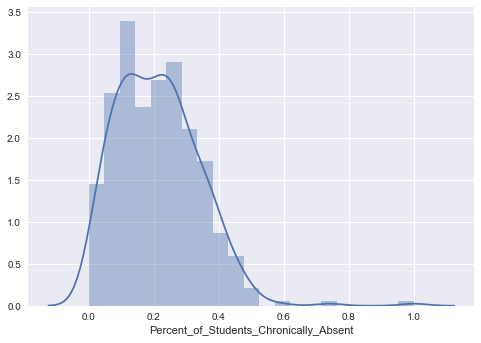

In [27]:
sns.distplot(data[data.School_Income_Estimate.isna()].Percent_of_Students_Chronically_Absent.dropna())

In [11]:
### Find missing value
working_data.isna().apply(np.sum, axis=0)

Percent_of_Students_Chronically_Absent     25
Student_Attendance_Rate                    25
Rigorous_Instruction_%                     25
Collaborative_Teachers_%                   25
Supportive_Environment_%                   25
Effective_School_Leadership_%              25
Strong_FamilyCommunity_Ties_%              25
Trust_%                                    25
Economic_Need_Index                        25
School_Income_Estimate                    396
Percent_ELL                                 0
Percent_Asian                               0
Percent_Black                               0
Percent_Hispanic                            0
Average_ELA_Proficiency                    55
Average_Math_Proficiency                   55
dtype: int64

In [12]:
working_data = working_data.dropna()

In [13]:
working_data.shape

(828, 16)

### distribution of attendance

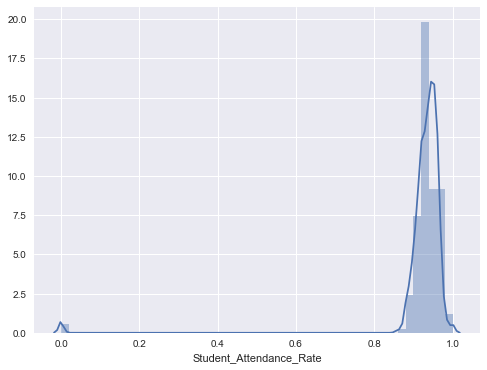

In [32]:
plt.style.use("seaborn")
plt.figure(figsize=(8,6))
sns.distplot(working_data.Student_Attendance_Rate)

In [65]:
data[data.Percent_of_Students_Chronically_Absent == 1.0]

,Adjusted_Grade,New?,Other_Location_Code_in_LCGMS,School_Name,SED_Code,Location_Code,District,Latitude,Longitude,Address_(Full),City,Zip,Grades,Grade_Low,Grade_High,Community_School?,Economic_Need_Index,School_Income_Estimate,Percent_ELL,Percent_Asian,Percent_Black,Percent_Hispanic,Percent_Black_/_Hispanic,Percent_White,Student_Attendance_Rate,Percent_of_Students_Chronically_Absent,Rigorous_Instruction_%,Rigorous_Instruction_Rating,Collaborative_Teachers_%,Collaborative_Teachers_Rating,Supportive_Environment_%,Supportive_Environment_Rating,Effective_School_Leadership_%,Effective_School_Leadership_Rating,Strong_FamilyCommunity_Ties_%,Strong_FamilyCommunity_Ties_Rating,Trust_%,Trust_Rating,Student_Achievement_Rating,Average_ELA_Proficiency,Average_Math_Proficiency,Grade_3_ELAAll_Students_Tested,Grade_3_ELA_4sAll_Students,Grade_3_ELA_4sAmerican_Indian_or_Alaska_Native,Grade_3_ELA_4sBlack_or_African_American,Grade_3_ELA_4sHispanic_or_Latino,Grade_3_ELA_4sAsian_or_Pacific_Islander,Grade_3_ELA_4sWhite,Grade_3_ELA_4sMultiracial,Grade_3_ELA_4sLimited_English_Proficient,Grade_3_ELA_4sEconomically_Disadvantaged,Grade_3_MathAll_Students_tested,Grade_3_Math_4sAll_Students,Grade_3_Math_4sAmerican_Indian_or_Alaska_Native,Grade_3_Math_4sBlack_or_African_American,Grade_3_Math_4sHispanic_or_Latino,Grade_3_Math_4sAsian_or_Pacific_Islander,Grade_3_Math_4sWhite,Grade_3_Math_4sMultiracial,Grade_3_Math_4sLimited_English_Proficient,Grade_3_Math_4sEconomically_Disadvantaged,Grade_4_ELAAll_Students_Tested,Grade_4_ELA_4sAll_Students,Grade_4_ELA_4sAmerican_Indian_or_Alaska_Native,Grade_4_ELA_4sBlack_or_African_American,Grade_4_ELA_4sHispanic_or_Latino,Grade_4_ELA_4sAsian_or_Pacific_Islander,Grade_4_ELA_4sWhite,Grade_4_ELA_4sMultiracial,Grade_4_ELA_4sLimited_English_Proficient,Grade_4_ELA_4sEconomically_Disadvantaged,Grade_4_MathAll_Students_Tested,Grade_4_Math_4sAll_Students,Grade_4_Math_4sAmerican_Indian_or_Alaska_Native,Grade_4_Math_4sBlack_or_African_American,Grade_4_Math_4sHispanic_or_Latino,Grade_4_Math_4sAsian_or_Pacific_Islander,Grade_4_Math_4sWhite,Grade_4_Math_4sMultiracial,Grade_4_Math_4sLimited_English_Proficient,Grade_4_Math_4sEconomically_Disadvantaged,Grade_5_ELAAll_Students_Tested,Grade_5_ELA_4sAll_Students,Grade_5_ELA_4sAmerican_Indian_or_Alaska_Native,Grade_5_ELA_4sBlack_or_African_American,Grade_5_ELA_4sHispanic_or_Latino,Grade_5_ELA_4sAsian_or_Pacific_Islander,Grade_5_ELA_4sWhite,Grade_5_ELA_4sMultiracial,Grade_5_ELA_4sLimited_English_Proficient,Grade_5_ELA_4sEconomically_Disadvantaged,Grade_5_MathAll_Students_Tested,Grade_5_Math_4sAll_Students,Grade_5_Math_4sAmerican_Indian_or_Alaska_Native,Grade_5_Math_4sBlack_or_African_American,Grade_5_Math_4sHispanic_or_Latino,Grade_5_Math_4sAsian_or_Pacific_Islander,Grade_5_Math_4sWhite,Grade_5_Math_4sMultiracial,Grade_5_Math_4sLimited_English_Proficient,Grade_5_Math_4sEconomically_Disadvantaged,Grade_6_ELAAll_Students_Tested,Grade_6_ELA_4sAll_Students,Grade_6_ELA_4sAmerican_Indian_or_Alaska_Native,Grade_6_ELA_4sBlack_or_African_American,Grade_6_ELA_4sHispanic_or_Latino,Grade_6_ELA_4sAsian_or_Pacific_Islander,Grade_6_ELA_4sWhite,Grade_6_ELA_4sMultiracial,Grade_6_ELA_4sLimited_English_Proficient,Grade_6_ELA_4sEconomically_Disadvantaged,Grade_6_MathAll_Students_Tested,Grade_6_Math_4sAll_Students,Grade_6_Math_4sAmerican_Indian_or_Alaska_Native,Grade_6_Math_4sBlack_or_African_American,Grade_6_Math_4sHispanic_or_Latino,Grade_6_Math_4sAsian_or_Pacific_Islander,Grade_6_Math_4sWhite,Grade_6_Math_4sMultiracial,Grade_6_Math_4sLimited_English_Proficient,Grade_6_Math_4sEconomically_Disadvantaged,Grade_7_ELAAll_Students_Tested,Grade_7_ELA_4sAll_Students,Grade_7_ELA_4sAmerican_Indian_or_Alaska_Native,Grade_7_ELA_4sBlack_or_African_American,Grade_7_ELA_4sHispanic_or_Latino,Grade_7_ELA_4sAsian_or_Pacific_Islander,Grade_7_ELA_4sWhite,Grade_7_ELA_4sMultiracial,Grade_7_ELA_4sLimited_English_Proficient,Grade_7_ELA_4sEconomically_Disadvantaged,Grade_7_MathAll_Students_Tested,Grade_7_Math_4sAll_Students,Grade_7_Math_

Text(0.5, 1.0, 'Distribution of percentage of students chronically absent')

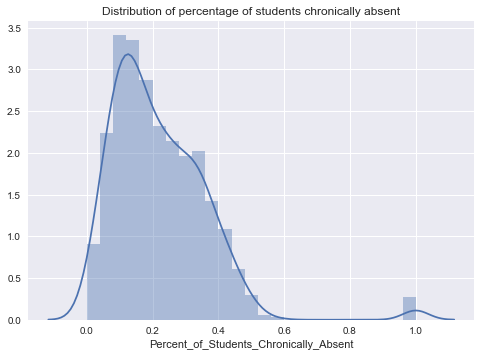

In [67]:
sns.distplot(working_data.Percent_of_Students_Chronically_Absent)
plt.title("Distribution of percentage of students chronically absent")

In [35]:
working_data.Percent_of_Students_Chronically_Absent.describe()

count    828.000000
mean       0.217935
std        0.145344
min        0.000000
25%        0.110000
50%        0.190000
75%        0.300000
max        1.000000
Name: Percent_of_Students_Chronically_Absent, dtype: float64

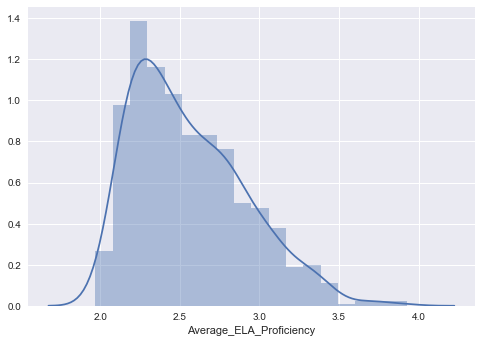

In [36]:
sns.distplot(working_data.Average_ELA_Proficiency)

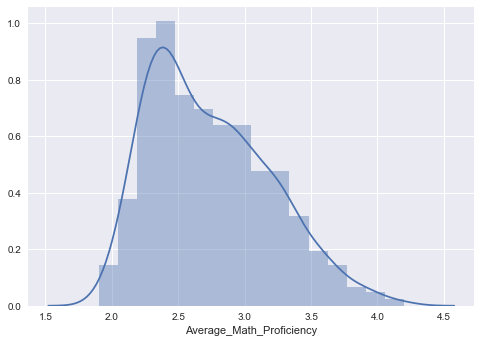

In [37]:
sns.distplot(working_data.Average_Math_Proficiency)

### random forest 

In [38]:
working_data['High_Absent_rate'] = working_data['Percent_of_Students_Chronically_Absent'] >= 0.20

In [39]:
working_data.shape

(828, 17)

In [40]:
working_data.head()

,Percent_of_Students_Chronically_Absent,Student_Attendance_Rate,Rigorous_Instruction_%,Collaborative_Teachers_%,Supportive_Environment_%,Effective_School_Leadership_%,Strong_FamilyCommunity_Ties_%,Trust_%,Economic_Need_Index,School_Income_Estimate,Percent_ELL,Percent_Asian,Percent_Black,Percent_Hispanic,Average_ELA_Proficiency,Average_Math_Proficiency,High_Absent_rate
0,0.18,0.94,0.89,0.94,0.86,0.91,0.85,0.94,0.919,31141.72,0.09,0.05,0.32,0.60,2.14,2.17,False
1,0.30,0.92,0.96,0.96,0.97,0.90,0.86,0.94,0.641,56462.88,0.05,0.10,0.20,0.63,2.63,2.98,True
2,0.20,0.94,0.87,0.77,0.82,0.61,0.80,0.79,0.744,44342.61,0.15,0.35,0.08,0.49,2.39,2.54,True
3,0.28,0.92,0.85,0.78,0.82,0.73,0.89,0.88,0.860,31454.00,0.07,0.05,0.29,0.63,2.48,2.47,True
4,0.23,0.93,0.90,0.88,0.87,0.81,0.89,0.93,0.730,46435.59,0.03,0.04,0.20,0.65,2.38,2.54,True


In [41]:
working_data.iloc[:,2:-3].head()

,Rigorous_Instruction_%,Collaborative_Teachers_%,Supportive_Environment_%,Effective_School_Leadership_%,Strong_FamilyCommunity_Ties_%,Trust_%,Economic_Need_Index,School_Income_Estimate,Percent_ELL,Percent_Asian,Percent_Black,Percent_Hispanic
0,0.89,0.94,0.86,0.91,0.85,0.94,0.919,31141.72,0.09,0.05,0.32,0.60
1,0.96,0.96,0.97,0.90,0.86,0.94,0.641,56462.88,0.05,0.10,0.20,0.63
2,0.87,0.77,0.82,0.61,0.80,0.79,0.744,44342.61,0.15,0.35,0.08,0.49
3,0.85,0.78,0.82,0.73,0.89,0.88,0.860,31454.00,0.07,0.05,0.29,0.63
4,0.90,0.88,0.87,0.81,0.89,0.93,0.730,46435.59,0.03,0.04,0.20,0.65


In [42]:
rf_model = skens.RandomForestClassifier(oob_score=True, criterion='entropy')

In [52]:
import warnings
warnings.filterwarnings('ignore')
param_grid = {
                 'n_estimators': [5, 10, 15, 20],
                 'max_depth': [3, 5, 7, 9],
             }
from sklearn.model_selection import GridSearchCV

grid_clf = GridSearchCV(rf_model, param_grid, cv=10)
grid_clf.fit(working_data.iloc[:,2:-3], working_data.High_Absent_rate)

print(grid_clf.best_params_)
print(grid_clf.best_score_)

{'max_depth': 3, 'n_estimators': 20}
0.822463768115942


In [44]:
rf_model = skens.RandomForestClassifier(n_estimators=10, max_depth=5, oob_score=True, criterion='entropy')
rf_model.fit(working_data.iloc[:,2:-3],working_data.High_Absent_rate)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [45]:
# Check feature importance
feat_importance = rf_model.feature_importances_
feat_importance

array([0.00839642, 0.01341464, 0.01425046, 0.03372493, 0.01523881,
       0.01439775, 0.36001078, 0.1541591 , 0.06162102, 0.05614655,
       0.22993599, 0.03870355])

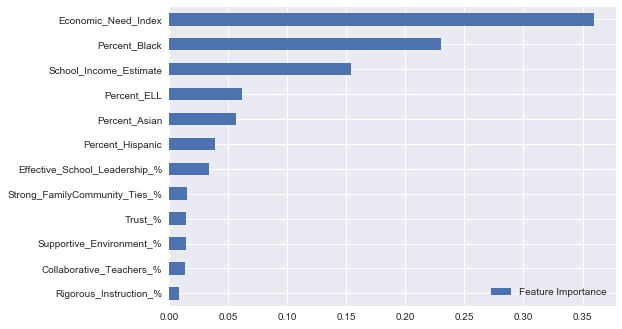

In [46]:
pd.DataFrame({'Feature Importance':feat_importance}, 
             index=working_data.columns[2:-3]).sort_values("Feature Importance", ascending=True).plot(kind='barh')

In [47]:
working_data.groupby("High_Absent_rate").mean()

,Percent_of_Students_Chronically_Absent,Student_Attendance_Rate,Rigorous_Instruction_%,Collaborative_Teachers_%,Supportive_Environment_%,Effective_School_Leadership_%,Strong_FamilyCommunity_Ties_%,Trust_%,Economic_Need_Index,School_Income_Estimate,Percent_ELL,Percent_Asian,Percent_Black,Percent_Hispanic,Average_ELA_Proficiency,Average_Math_Proficiency
High_Absent_rate,,,,,,,,,,,,,,,,
False,0.111111,0.953948,0.915437,0.901442,0.919433,0.831158,0.856478,0.917754,0.526738,59168.305177,0.124208,0.198723,0.198747,0.324090,2.776478,3.024657
True,0.329506,0.895802,0.898000,0.873333,0.889877,0.788049,0.843704,0.896420,0.807541,37759.210815,0.132370,0.048025,0.411012,0.478938,2.327086,2.442938


Text(0.5, 1.0, 'Distribution of Average ELA Proficiency')

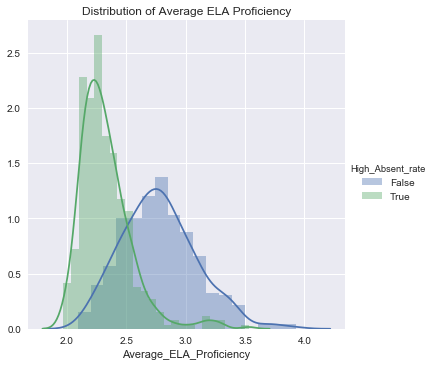

In [48]:
g = sns.FacetGrid(working_data, hue='High_Absent_rate', height=5)
g.map(sns.distplot, "Average_ELA_Proficiency", hist=True)
g.add_legend()
plt.title("Distribution of Average ELA Proficiency")

Text(0.5, 1.0, 'Distribution of Average Math Proficiency')

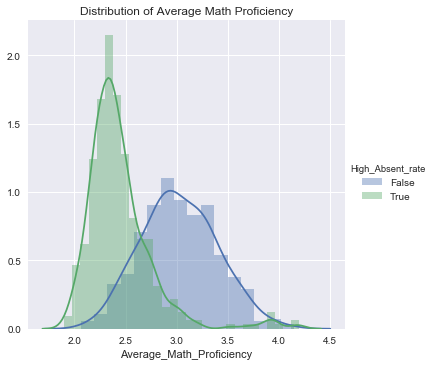

In [51]:
g = sns.FacetGrid(working_data, hue='High_Absent_rate', height=5)
g.map(sns.distplot, "Average_Math_Proficiency", hist=True)
g.add_legend()
plt.title("Distribution of Average Math Proficiency")

AttributeError: 'DataFrame' object has no attribute 'High_Absent_rate'